# **CS624-Assignment-1**

<h1><strong><font color='Green'>Sleep Health and Lifestyle Analysis</font> </em></strong> </h1>

**<h1><strong><font color='#0685c4'>Dataset Details</font> </em></strong> </h1>**

This dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

### **Objective**
  * Data Analysis and Visualization for potential spleeping disorder.

### **Fields**

* Person ID: An identifier for each individual.
* Gender: The gender of the person (Male/Female).
* Age: The age of the person in years.
* Occupation: The occupation or profession of the person.
* Sleep Duration: Average number of hours of sleep per day
* Quality of Sleep: A subjective rating on a 1-10 scale
* Physical Activity Level: Average number of minutes the person engages in physical activity daily
* Stress Level: A subjective rating on a 1-10 scale
* BMI Category
* Blood Pressure: Indicated as systolic pressure over diastolic pressure
* Heart Rate: In beats per minute
* Daily Steps
* Sleep Disorder: One of None, Insomnia or Sleep Apnea

### **Details about Sleep Disorder Column**

* None: The individual does not exhibit any specific sleep disorder.
* Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
* Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.


### **Key Features of the Dataset**
* Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
* Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
* Cardiovascular Health: Examine blood pressure and heart rate measurements.
* Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

### **Datatypes**
* Person ID Integer

* Gender String

* Age Integer

* Occupation String

* Sleep Duration Numeric

* Quality of Sleep Integer

* Physical Activity Level Integer

* Stress Level Integer

* BMI Category  String

* Blood Pressure Integer



<h1><strong><font color='#0685c4'>Import Python Libraries</font> </em></strong> </h1>

In [36]:
# Python libraries
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.lines as mlines
import plotly.express as px
import plotly.graph_objects as go

#Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


<h1><strong><font color='#0685c4'>Data Acquisition</font> </em></strong> </h1>

In [37]:
# Class for data acquisition
class DataAcquisition:

  def __init__(self,datasetname):
    self.datasetname = datasetname

  def ReadCsv(self):
    raw_data = pd.read_csv(os.path.join('/content/',self.datasetname),
                           sep=',',encoding='UTF-8')
    return raw_data



acq = DataAcquisition('dataset.csv')
raw_data = acq.ReadCsv()
raw_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<h1><strong><font color='#0685c4'>Data PreProcessing</font> </em></strong> </h1>

In [38]:
# Class for data preprocessing
class DataPreprocessing:

  def __init__(self,dataframe):
    self.dataframe = dataframe


  def RenameColumns(self,columns_dict):
     self.dataframe.rename(columns=columns_dict, errors="raise",inplace=True)
     return self.dataframe


  def DatasetInfo(self):
    self.dataframe.info()


  def Summary(self):
        summ = pd.DataFrame(self.dataframe.dtypes, columns=['dtypes'])
        summ['null'] = self.dataframe.isnull().sum()
        summ['unique'] = self.dataframe.nunique()
        summ['min'] = self.dataframe.min()
        summ['median'] = self.dataframe.median()
        summ['max'] = self.dataframe.max()
        summ['mean'] =  self.dataframe.mean()
        summ['std'] =  self.dataframe.std()
        summ['duplicate'] =  self.dataframe.duplicated().sum()
        return summ


preproc = DataPreprocessing(raw_data)

In [39]:
column_dict={
    "Person ID":"Person_ID",
    "Sleep Duration":"Sleep_Duration",
    "Quality of Sleep":"Quality_of_Sleep",
    "Physical Activity Level":"Physical_Activity_Level",
    "Stress Level":"Stress_Level",
    "BMI Category":"BMI_Category",
    "Blood Pressure":"Blood_Pressure",
    "Heart Rate":"Heart_Rate",
    "Daily Steps":"Daily_Steps",
    "Sleep Disorder":"Sleep_Disorder"

}
cleaned_data=preproc.RenameColumns(column_dict)

In [40]:
#Dataset information
preproc.DatasetInfo()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Quality_of_Sleep         374 non-null    int64  
 6   Physical_Activity_Level  374 non-null    int64  
 7   Stress_Level             374 non-null    int64  
 8   BMI_Category             374 non-null    object 
 9   Blood_Pressure           374 non-null    object 
 10  Heart_Rate               374 non-null    int64  
 11  Daily_Steps              374 non-null    int64  
 12  Sleep_Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### **Observations**

* There are total 373 rows in the dataset and 13 fields.
* There 1 float 7 integer and 5 object type data.
* All the object datatype should be changed to approprirate datatypes.

<h1><strong><font color='#0685c4'>Dataset Summary</font> </em></strong> </h1>

In [41]:
# Dataset Summary
summary=preproc.Summary()
summary

,dtypes,null,unique,min,median,max,mean,std,duplicate
Person_ID,int64,0,374,1,187.5,374,187.500000,108.108742,0
Gender,object,0,2,Female,NaN,Male,NaN,NaN,0
Age,int64,0,31,27,43.0,59,42.184492,8.673133,0
Occupation,object,0,11,Accountant,NaN,Teacher,NaN,NaN,0
Sleep_Duration,float64,0,27,5.8,7.2,8.5,7.132086,0.795657,0
Quality_of_Sleep,int64,0,6,4,7.0,9,7.312834,1.196956,0
Physical_Activity_Level,int64,0,16,30,60.0,90,59.171123,20.830804,0
Stress_Level,int64,0,6,3,5.0,8,5.385027,1.774526,0
BMI_Category,object,0,4,Normal,NaN,Overweight,NaN,NaN,0
Blood_Pressure,object,0,25,115/75,NaN,142/92,NaN,NaN,0


<h1><strong><font color='#0685c4'>Feature Engineering</font> </em></strong> </h1>

In [42]:
#Featuring Engineering
cleaned_data['BMI_Category'] = np.where(cleaned_data['BMI_Category']=='Normal Weight', 'Normal', cleaned_data['BMI_Category'])
cleaned_data['Systolic'] = cleaned_data['Blood_Pressure'].str.split('/').str[0].astype(int)
cleaned_data['Diastolic'] = cleaned_data['Blood_Pressure'].str.split('/').str[1].astype(int)

In [43]:
# Function to get the level of systolic and diastolic pressure
def bp_category(systolic, diastolic):
    if systolic <= 120 and diastolic <= 80:
        return 'Normal'
    elif 120 < systolic <= 129 and diastolic <= 80:
        return 'Elevated'
    elif (130 <= systolic <= 139) or (80 < diastolic < 89):
        return 'Stage 1'
    else:
        return 'Stage 2'

In [44]:
cleaned_data['BP_Category'] = cleaned_data.apply(lambda row: bp_category(row['Systolic'], row['Diastolic']), axis=1)
cleaned_data['Sleep_Disorder'] = np.where(cleaned_data['Sleep_Disorder'].isna(), 'Normal', cleaned_data['Sleep_Disorder'])
cleaned_data.drop(columns=['Blood_Pressure', 'Systolic', 'Diastolic','Person_ID'], axis=1, inplace=True)
cleaned_data

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,BP_Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,Elevated
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,Elevated
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Stage 2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Stage 2
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Stage 2
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,Stage 2
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Stage 2
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Stage 2


<h1><strong><font color='#0685c4'>Gender Distribution</font> </em></strong> </h1>

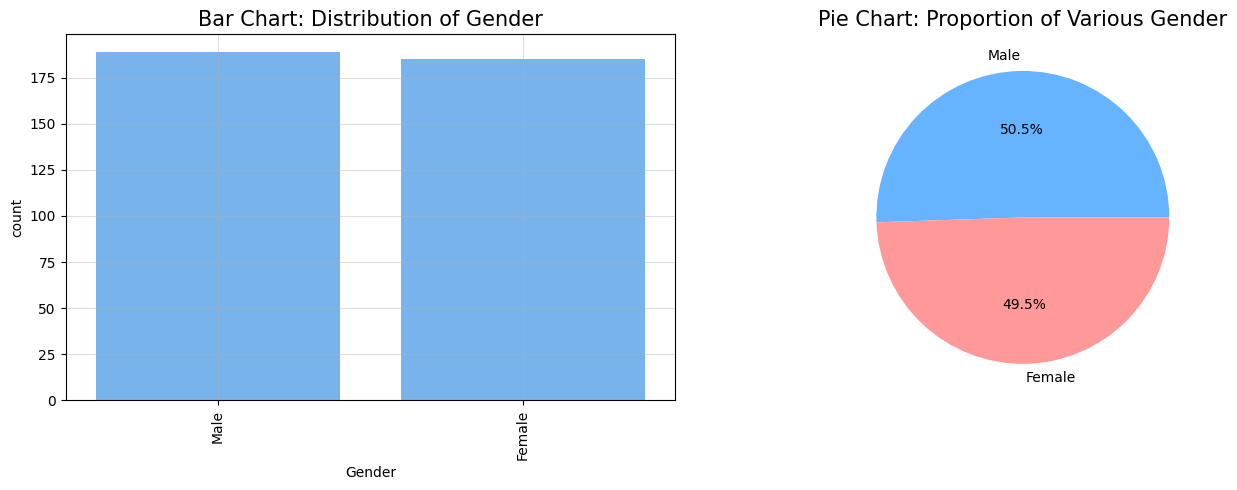

In [45]:
# distribution of feature `Gender`
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1,1.5]})
sns.countplot(data=cleaned_data, x='Gender', ax=axes[0],color='#66b3ff')
colors=['#66b3ff','#ff9999']
axes[0].set_title('Bar Chart: Distribution of Gender', fontsize=15)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.4)
axes[1].pie(cleaned_data['Gender'].value_counts().values, labels=cleaned_data.Gender.unique(), autopct='%1.1f%%',colors=colors)
axes[1].set_title('Pie Chart: Proportion of Various Gender', fontsize=15)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>Age Distribution</font> </em></strong> </h1>

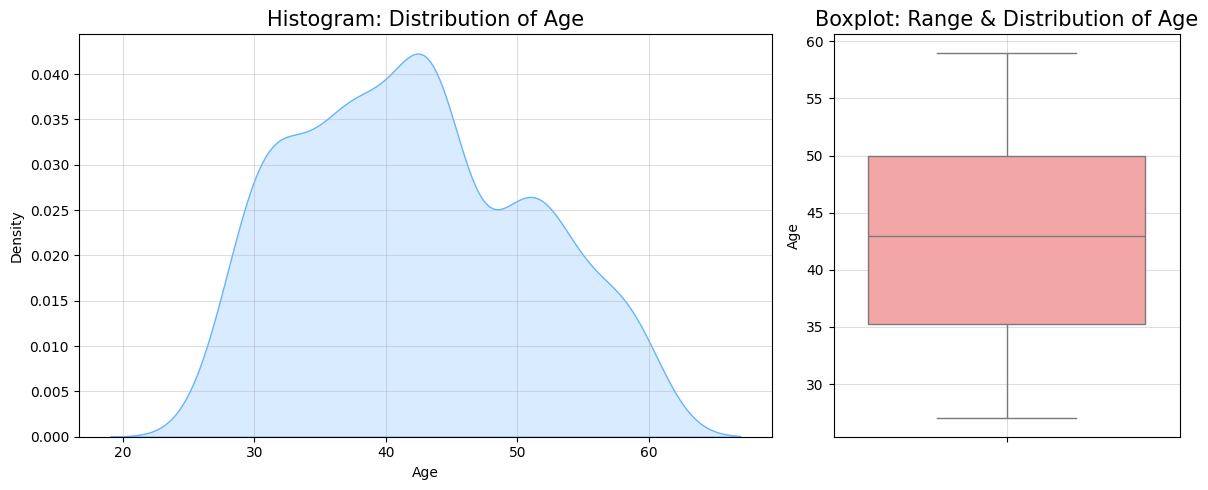

In [46]:
# visualization: histogram & boxplot
figure, axes = plt.subplots(1,2, figsize=(12,5), gridspec_kw={'width_ratios':[2,1]})
sns.kdeplot(data=cleaned_data, x='Age', ax=axes[0],color='#66b3ff',fill=True)
axes[0].set_title('Histogram: Distribution of Age', fontsize=15)
axes[0].grid(alpha=0.4)
sns.boxplot(data=cleaned_data, y='Age', ax=axes[1],color='#ff9999')
axes[1].set_title('Boxplot: Range & Distribution of Age', fontsize=15)
axes[1].grid(alpha=0.4)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>Occupation Distribution</font> </em></strong> </h1>

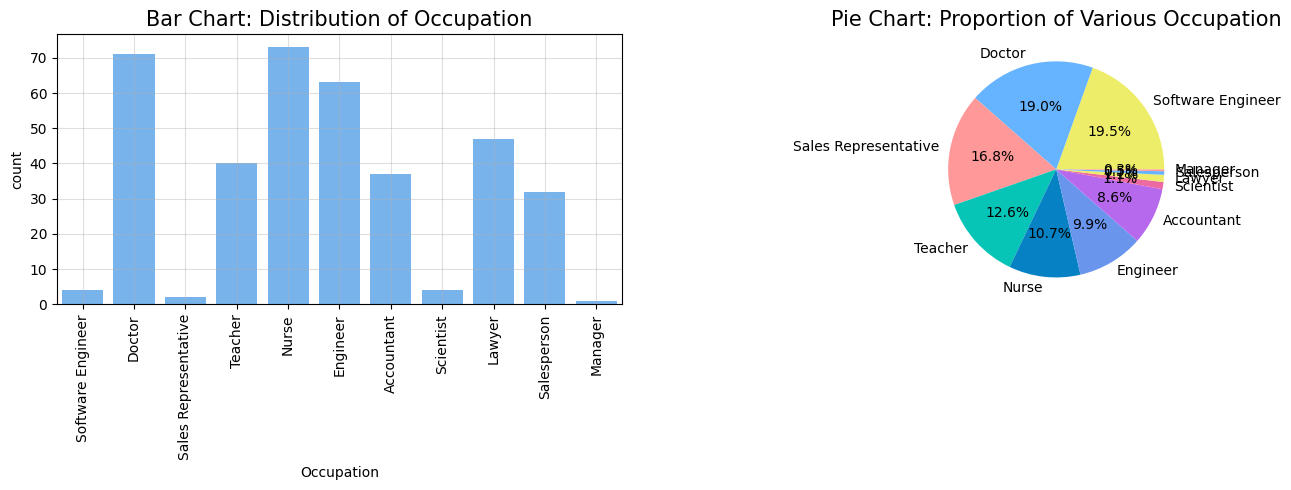

In [47]:
# distribution of feature `Occupation`
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1,1.5]})
colors = ['#eded69','#66b3ff','#ff9999','#06c4b6','#0682c4','#6995ed','#b769ed','#ed69a1']
sns.countplot(data=cleaned_data, x='Occupation', ax=axes[0],color='#66b3ff')
axes[0].set_title('Bar Chart: Distribution of Occupation', fontsize=15)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.4)
axes[1].pie(cleaned_data['Occupation'].value_counts().values, labels=cleaned_data.Occupation.unique(), autopct='%1.1f%%',colors=colors)
axes[1].set_title('Pie Chart: Proportion of Various Occupation', fontsize=15)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'> Sleep Duration Distribution</font> </em></strong> </h1>

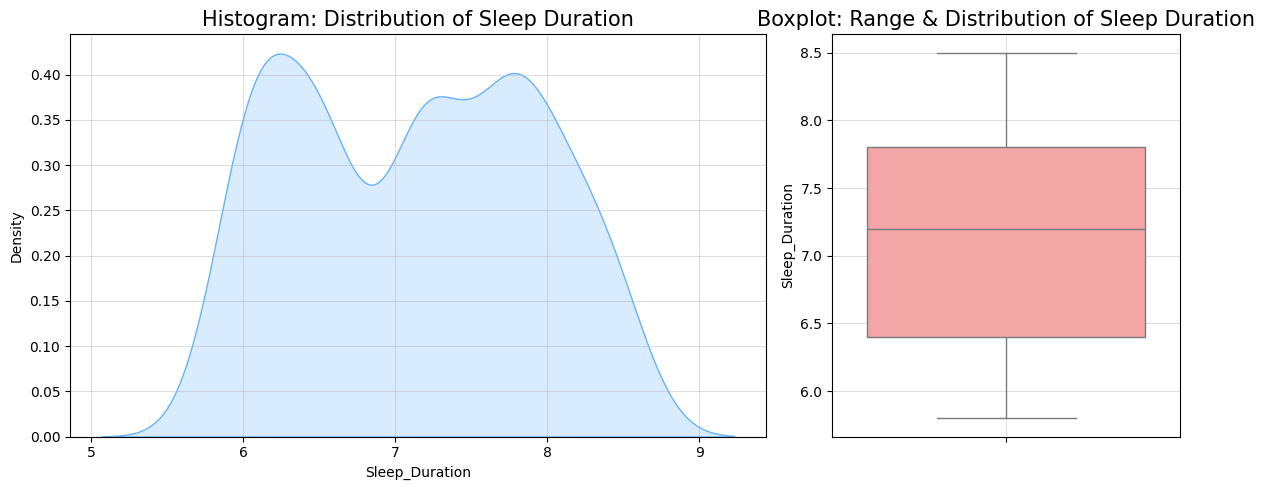

In [48]:
# visualization: distribution of feature `Sleep_Duration`
figure, axes = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios':[2,1]})
sns.kdeplot(data=cleaned_data, x='Sleep_Duration', color='#66b3ff', ax=axes[0],fill=True)
axes[0].set_title('Histogram: Distribution of Sleep Duration', fontsize=15)
axes[0].grid(alpha=0.4)
sns.boxplot(data=cleaned_data, y='Sleep_Duration', color='#ff9999', ax=axes[1])
axes[1].set_title('Boxplot: Range & Distribution of Sleep Duration', fontsize=15)
axes[1].grid(alpha=0.4)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'> Sleep Qaulity</font> </em></strong> </h1>

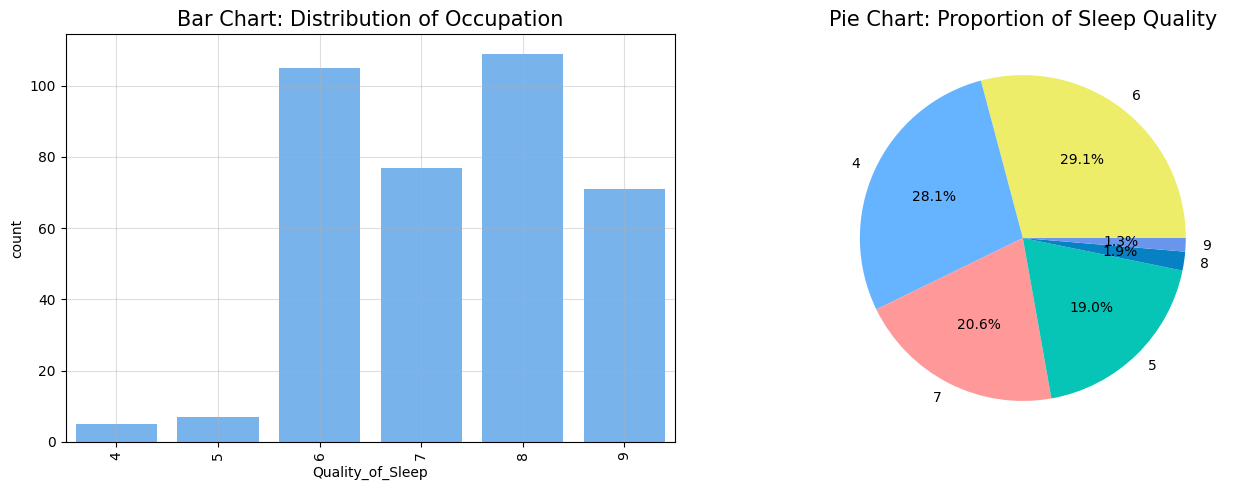

In [49]:
# distribution of feature `Sleep Quality`
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1,1.5]})
colors = ['#eded69','#66b3ff','#ff9999','#06c4b6','#0682c4','#6995ed']
sns.countplot(data=cleaned_data, x='Quality_of_Sleep', ax=axes[0],color='#66b3ff')
axes[0].set_title('Bar Chart: Distribution of Occupation', fontsize=15)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.4)
axes[1].pie(cleaned_data['Quality_of_Sleep'].value_counts().values, labels=cleaned_data.Quality_of_Sleep.unique(), autopct='%1.1f%%',colors=colors)
axes[1].set_title('Pie Chart: Proportion of Sleep Quality', fontsize=15)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>Physical Activity Level</font> </em></strong> </h1>

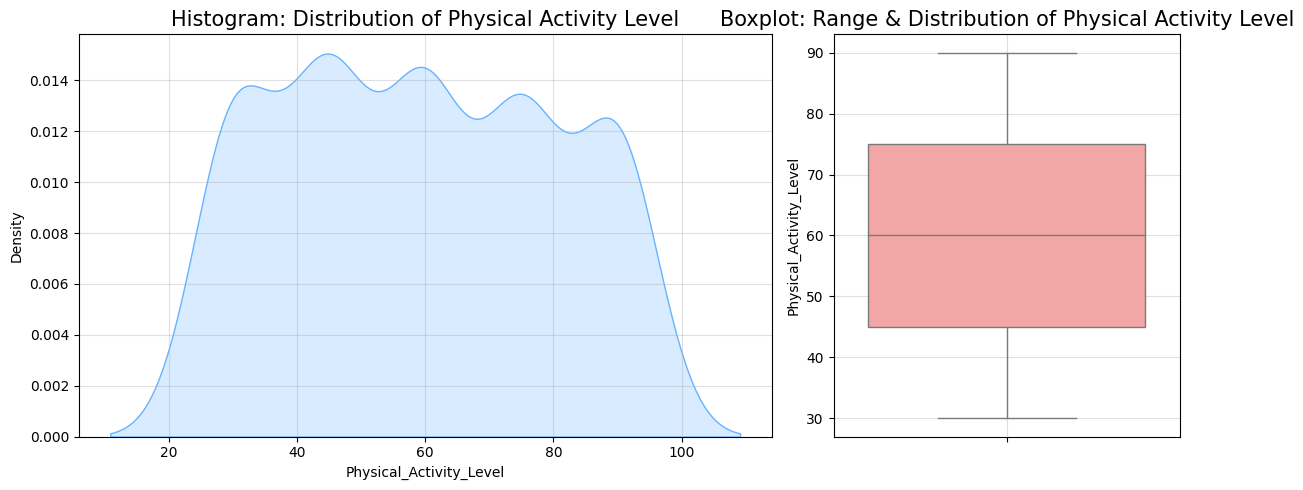

In [50]:
# visualization: distribution of feature `Physical_Activity_Level`
figure, axes = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios':[2,1]})
sns.kdeplot(data=cleaned_data, x='Physical_Activity_Level', color='#66b3ff', ax=axes[0],fill=True)
axes[0].set_title('Histogram: Distribution of Physical Activity Level', fontsize=15)
axes[0].grid(alpha=0.4)
sns.boxplot(data=cleaned_data, y='Physical_Activity_Level', color='#ff9999', ax=axes[1])
axes[1].set_title('Boxplot: Range & Distribution of Physical Activity Level', fontsize=15)
axes[1].grid(alpha=0.4)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>Stress Level</font> </em></strong> </h1>

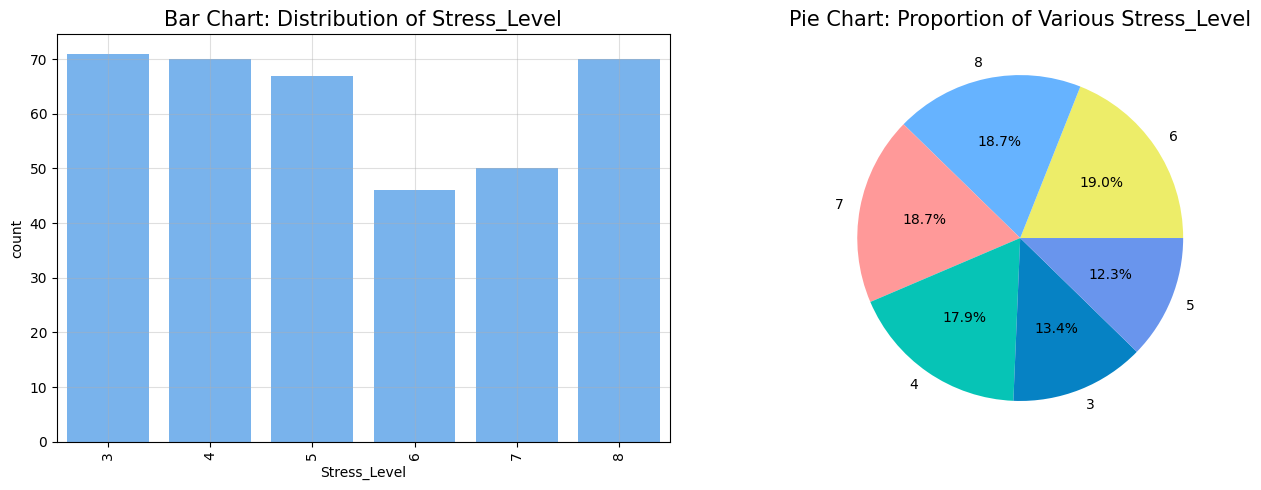

In [51]:
# distribution of feature `Stress_Level`
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1,1.5]})
colors = ['#eded69','#66b3ff','#ff9999','#06c4b6','#0682c4','#6995ed','#b769ed','#ed69a1']
sns.countplot(data=cleaned_data, x='Stress_Level', ax=axes[0],color='#66b3ff')
axes[0].set_title('Bar Chart: Distribution of Stress_Level', fontsize=15)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.4)
axes[1].pie(cleaned_data['Stress_Level'].value_counts().values, labels=cleaned_data.Stress_Level.unique(), autopct='%1.1f%%',colors=colors)
axes[1].set_title('Pie Chart: Proportion of Various Stress_Level', fontsize=15)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>BMI Category</font> </em></strong> </h1>

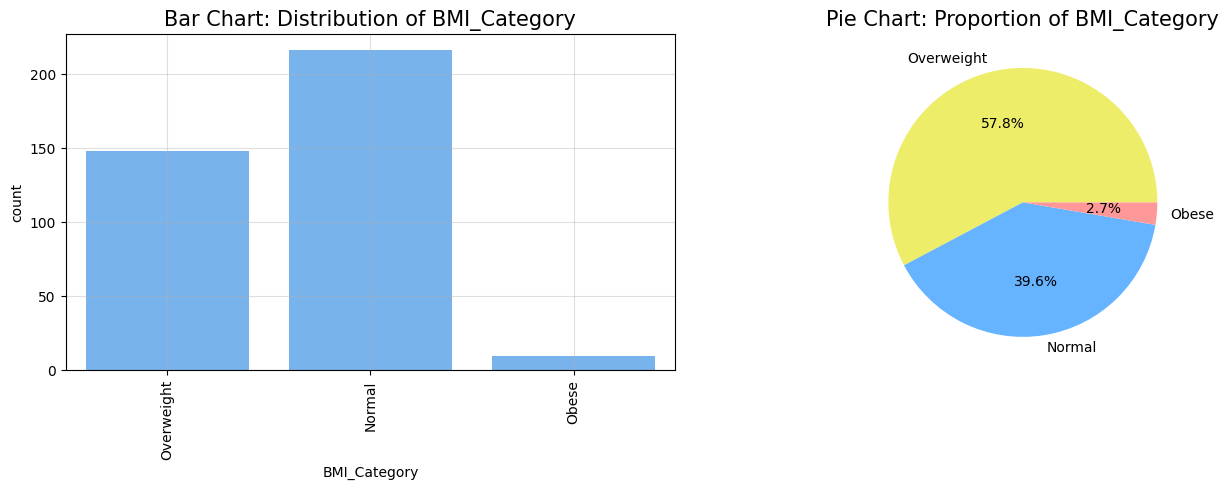

In [52]:
# distribution of feature `BMI_Category`
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1,1.5]})
colors = ['#eded69','#66b3ff','#ff9999','#06c4b6','#0682c4','#6995ed']
sns.countplot(data=cleaned_data, x='BMI_Category', ax=axes[0],color='#66b3ff')
axes[0].set_title('Bar Chart: Distribution of BMI_Category', fontsize=15)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.4)
axes[1].pie(cleaned_data['BMI_Category'].value_counts().values, labels=cleaned_data.BMI_Category.unique(), autopct='%1.1f%%',colors=colors)
axes[1].set_title('Pie Chart: Proportion of BMI_Category', fontsize=15)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>Heart Rate</font> </em></strong> </h1>

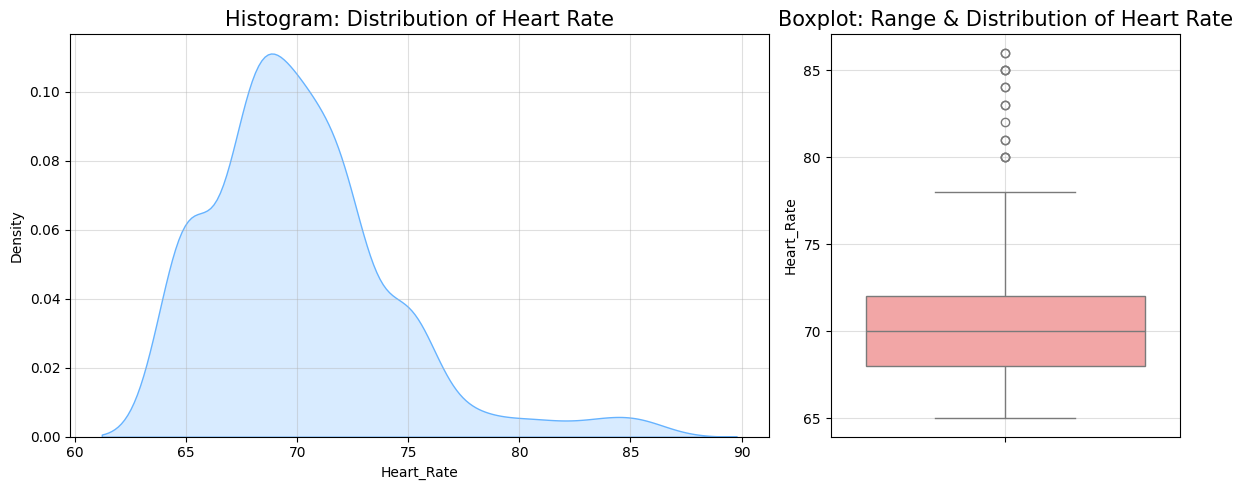

In [53]:
# visualization: distribution of feature `Heart_Rate`
figure, axes = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios':[2,1]})
sns.kdeplot(data=cleaned_data, x='Heart_Rate', color='#66b3ff', ax=axes[0],fill=True)
axes[0].set_title('Histogram: Distribution of Heart Rate', fontsize=15)
axes[0].grid(alpha=0.4)
sns.boxplot(data=cleaned_data, y='Heart_Rate', color='#ff9999', ax=axes[1])
axes[1].set_title('Boxplot: Range & Distribution of Heart Rate', fontsize=15)
axes[1].grid(alpha=0.4)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>Daily Steps</font> </em></strong> </h1>

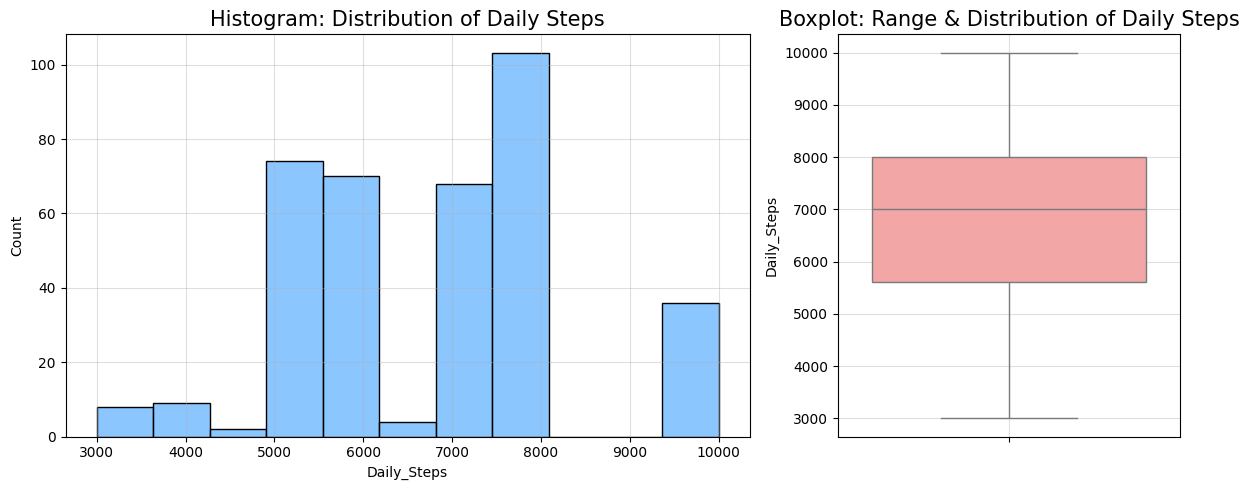

In [54]:
# visualization: distribution of feature `Daily_Steps`
figure, axes = plt.subplots(1,2,figsize=(12,5), gridspec_kw={'width_ratios':[2,1]})
sns.histplot(data=cleaned_data, x='Daily_Steps', color='#66b3ff', ax=axes[0])
axes[0].set_title('Histogram: Distribution of Daily Steps', fontsize=15)
axes[0].grid(alpha=0.4)
sns.boxplot(data=cleaned_data, y='Daily_Steps', color='#ff9999', ax=axes[1])
axes[1].set_title('Boxplot: Range & Distribution of Daily Steps', fontsize=15)
axes[1].grid(alpha=0.4)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>BP Category</font> </em></strong> </h1>

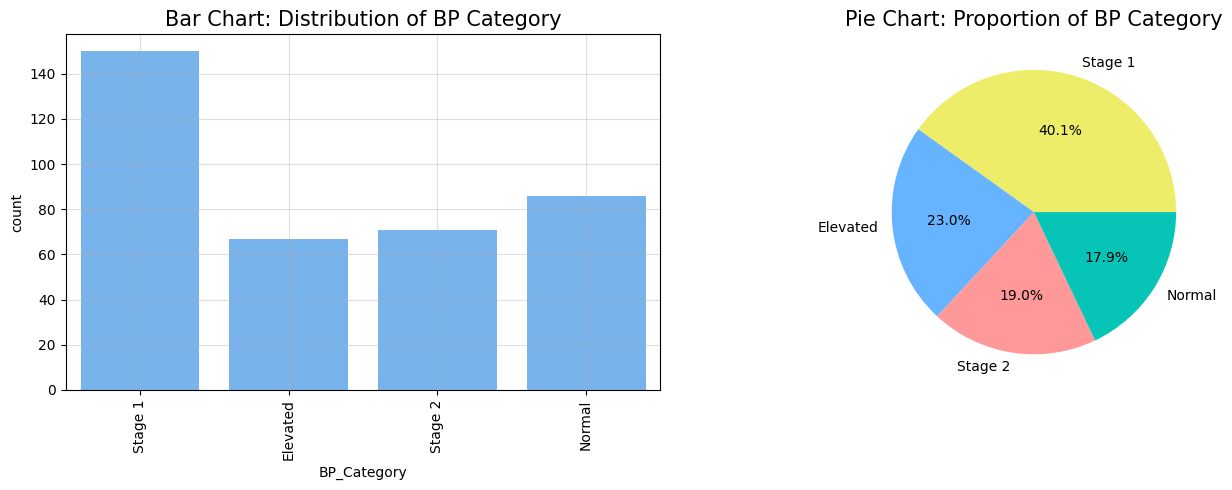

In [55]:
# distribution of feature `BP_Category`
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1,1.5]})
colors = ['#eded69','#66b3ff','#ff9999','#06c4b6','#0682c4','#6995ed']
sns.countplot(data=cleaned_data, x='BP_Category', ax=axes[0],color='#66b3ff')
axes[0].set_title('Bar Chart: Distribution of BP Category', fontsize=15)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.4)
axes[1].pie(cleaned_data['BP_Category'].value_counts().values, labels=cleaned_data.BP_Category.unique(), autopct='%1.1f%%',colors=colors)
axes[1].set_title('Pie Chart: Proportion of BP Category', fontsize=15)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>BP Category</font> </em></strong> </h1>

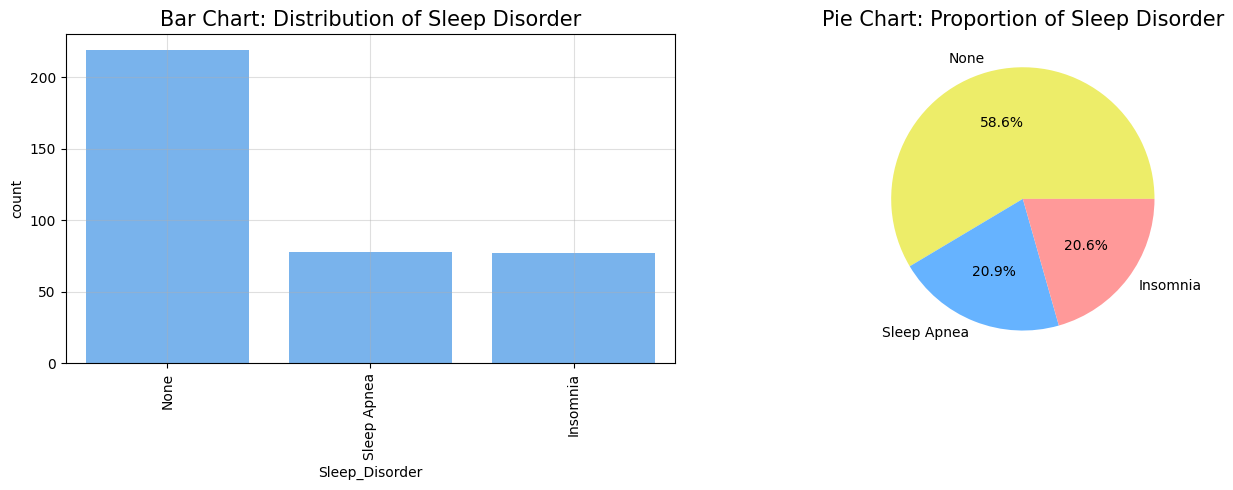

In [56]:
# distribution of feature `Sleep_Disorder`
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1,1.5]})
colors = ['#eded69','#66b3ff','#ff9999','#06c4b6','#0682c4','#6995ed']
sns.countplot(data=cleaned_data, x='Sleep_Disorder', ax=axes[0],color='#66b3ff')
axes[0].set_title('Bar Chart: Distribution of Sleep Disorder', fontsize=15)
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(alpha=0.4)
axes[1].pie(cleaned_data['Sleep_Disorder'].value_counts().values, labels=cleaned_data.Sleep_Disorder.unique(), autopct='%1.1f%%',colors=colors)
axes[1].set_title('Pie Chart: Proportion of Sleep Disorder', fontsize=15)
plt.tight_layout()
plt.show()

<h1><strong><font color='#0685c4'>Numerical Correlation</font> </em></strong> </h1>

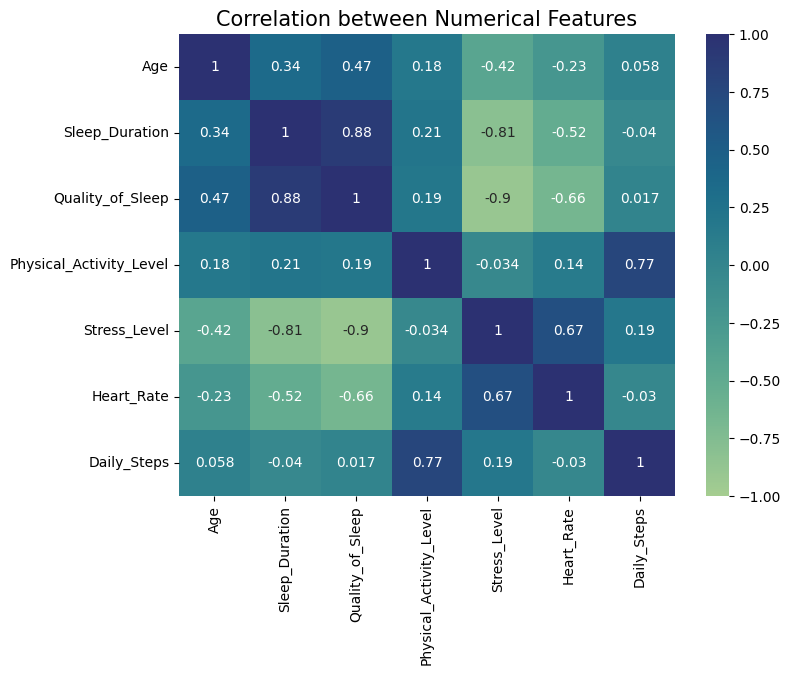

In [57]:
# correlation matrix
correlation = cleaned_data[['Age','Sleep_Duration','Quality_of_Sleep','Physical_Activity_Level','Stress_Level','Heart_Rate','Daily_Steps']].corr()

# visualization - heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='crest')
plt.title('Correlation between Numerical Features', fontsize=15)
plt.show()

<h1><strong><font color='#0685c4'>Dataset Inferences</font> </em></strong> </h1>

* There no nulls and no duplicates in dataset.

* The `Gender` is evenly distributed in dataset.

* The mean `Age` is distributed between 42-43 years among both `Genders`.

* Software engineer and doctors occupy highest counts whereas managers and sales representative lowest count.

* More than 50% of the population sleeps for more than 6 hours.

* Overall population have better sleep quality.

* 50% of the overall population does good amount physicall activity.

* There are outliers in the `Physical Activity`

* 40% of the population have `Stage 1` BP category and 17% of the population are normal.

* 58.6% of the population have no sleep disorder, 20.6 % have insomaia and 20.9% have sleep Apnea.

* As seen from corraltion matrix, `Sleep Duration`,`Physical Activity`,`Quality of Sleep` and `Stress Level` features are hightly correlated features.

<h1><strong><font color='#0685c4'>Future Work</font> </em></strong> </h1>

* This dataset can be used for multilabel classification problem to detect sleep anomalies.

* Various null hypotheses can be formed based on each of the features to detect sleep disorder.

In [58]:
%%capture
!pip install nbconvert
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [59]:
# https://saturncloud.io/blog/convert-google-colab-notebook-to-pdf-html/
!jupyter nbconvert  '/content/drive/MyDrive/Colab Notebooks/CS624-Assignment-1.ipynb' --to pdf

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CS624-Assignment-1.ipynb to pdf
[NbConvertApp] Support files will be in CS624-Assignment-1_files/
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Making directory ./CS624-Assignment-1_files
[NbConvertApp] Writing 85250 bytes to notebook.tex
[NbConvert